## 🤖 Step 4: Model Training with Lag Features
We'll train a Random Forest model to predict `Total_PowerConsumption` using past values and time-based features.

In [12]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

## 📥 Load cleaned dataset

In [13]:
df = pd.read_csv('../Datasets/cleaned_powerconsumption.csv', parse_dates=['Datetime'], index_col='Datetime')

## 🧹 Drop rows with missing lags

In [15]:
df.dropna(inplace=True)

## ✂️ Split features and target

In [16]:
features = ['Temperature', 'Humidity', 'WindSpeed', 'hour', 'dayofweek', 'is_weekend']
X = df[features]
y = df['Total_PowerConsumption']

## 🔀 Train/Test Split (80/20)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## 🎯 Train Random Forest Regressor

In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 📈 Evaluate with RMSE

In [19]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 7178.68


## 📊 Plot: Actual vs Predicted

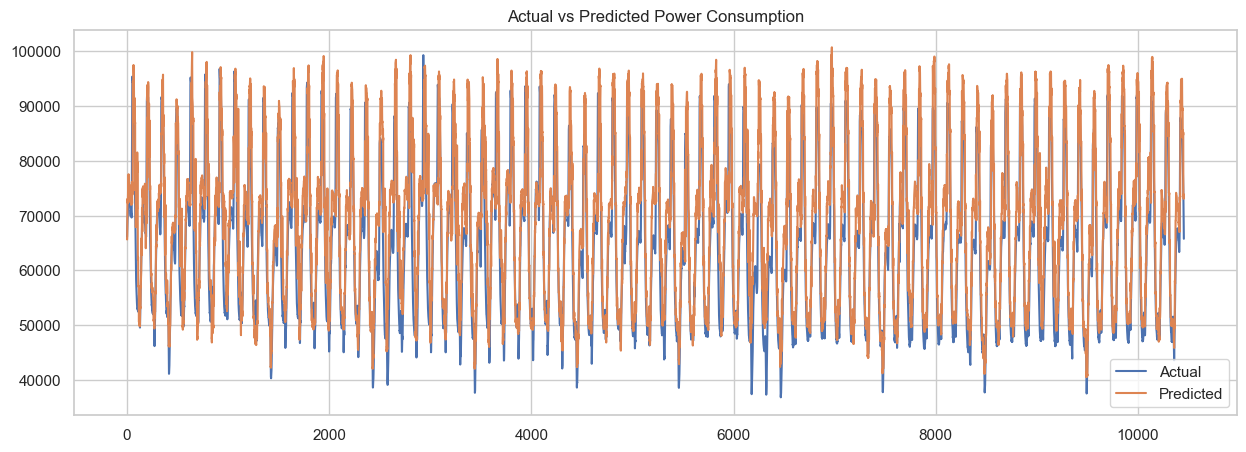

In [20]:
plt.figure(figsize=(15, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Actual vs Predicted Power Consumption")
plt.legend()
plt.show()